<h1>United Kingdom Road Accident</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('dataset\\accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown surface condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted weather conditions')

In [8]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [10]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Index'] = accident['Index'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')

<h1>Extracting date information using pandas date time</h1>

In [11]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [12]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1>Univariate</h1>

In [13]:
df_2019 = accident

<h1>Percentage of total accident per light conditions</h1>

In [14]:
accident['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [15]:
accident['Light_Conditions'].value_counts().sum()

660679

<h1>Insight 1</h1>

In [16]:
accident[accident['Light_Conditions'] == 'Daylight'].value_counts().sum()

484880

<h3>Insight 1.1</h3>
<h4>Daylight constitute 73.39% total of accidents</h4>

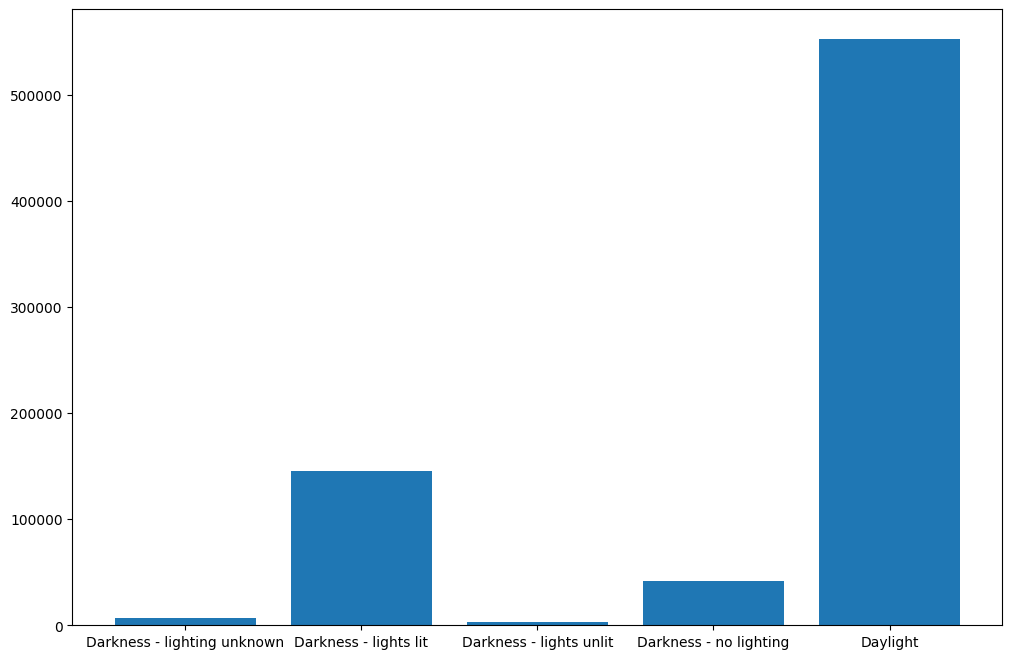

In [17]:
visual1 = accident.groupby(['Light_Conditions', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = visual1['Light_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y)
plt.gcf().set_size_inches(12, 8)
plt.show()

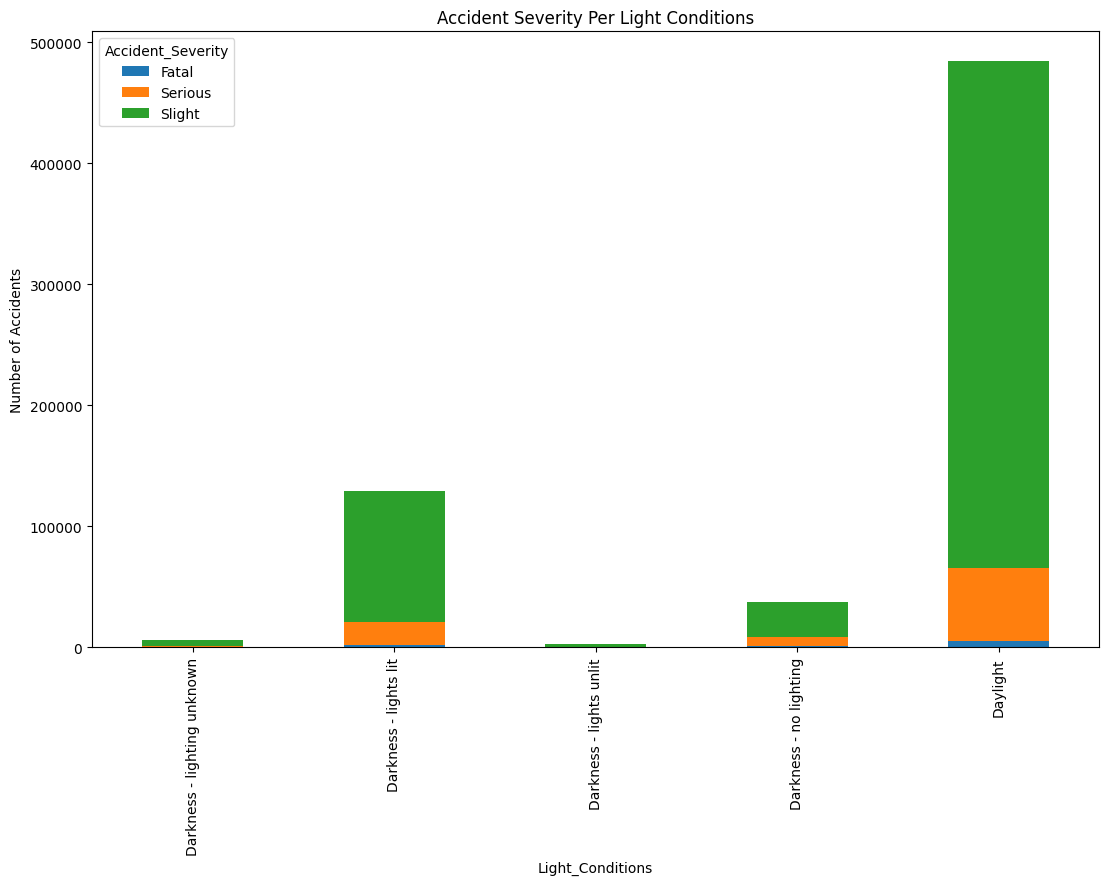

In [18]:
accidents_per_light_severity = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().unstack().fillna(0)

accidents_per_light_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity Per Light Conditions')
plt.xlabel('Light_Conditions')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h1>Insight 2</h1>

In [19]:
accident[accident['Light_Conditions'] == 'Darkness - lights lit'].value_counts().sum()

129335

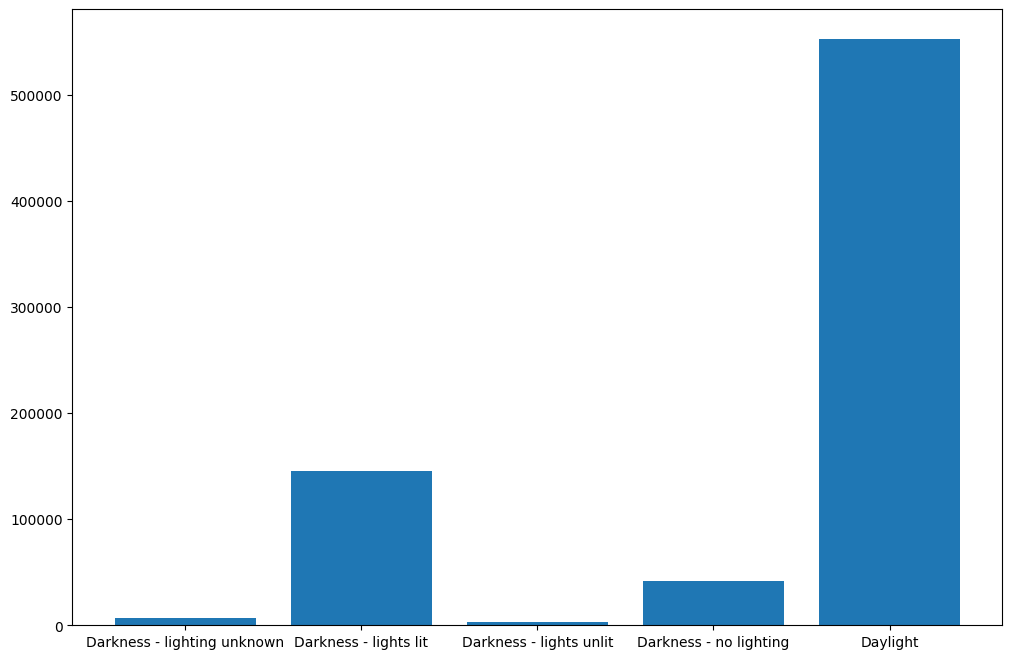

In [20]:
x = visual1['Light_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h3>Insight 2.1</h3>
<h4>Darkness - lights lit constitute 19.58% total of accidents</h4>

<h1>Insight 3</h1>

In [21]:
accident[accident['Light_Conditions'] == 'Darkness - no lighting'].value_counts().sum()

37437

<h3>Insight 3.1</h3>
<h4>Darkness - no lighting constitute 5.67% total of accidents</h4>

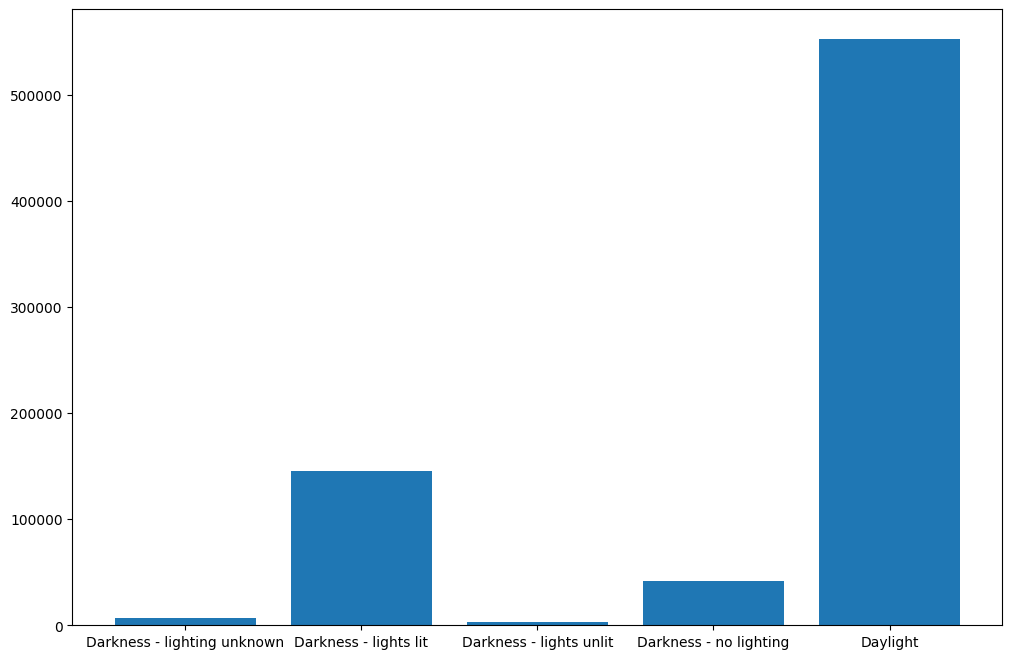

In [22]:
x = visual1['Light_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 4</h1>

In [23]:
accident[accident['Light_Conditions'] == 'Darkness - lighting unknown'].value_counts().sum()

6484

<h3>Insight 4.1</h3>
<h4>Darkness - lighting unknown constitute 0.98% total of accidents</h4>

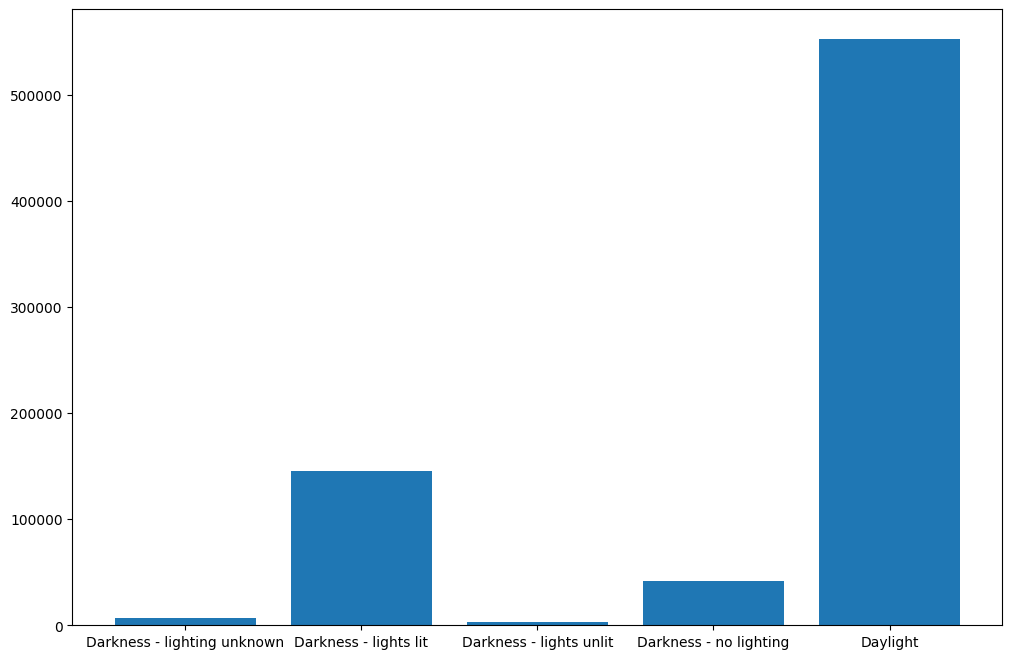

In [24]:
x = visual1['Light_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 5</h1>

In [25]:
accident[accident['Light_Conditions'] == 'Darkness - lights unlit'].value_counts().sum()

2543

<h3>Insight 5.1</h3>
<h4>Darkness - lights unlit constitute 0.38% total of accidents</h4>

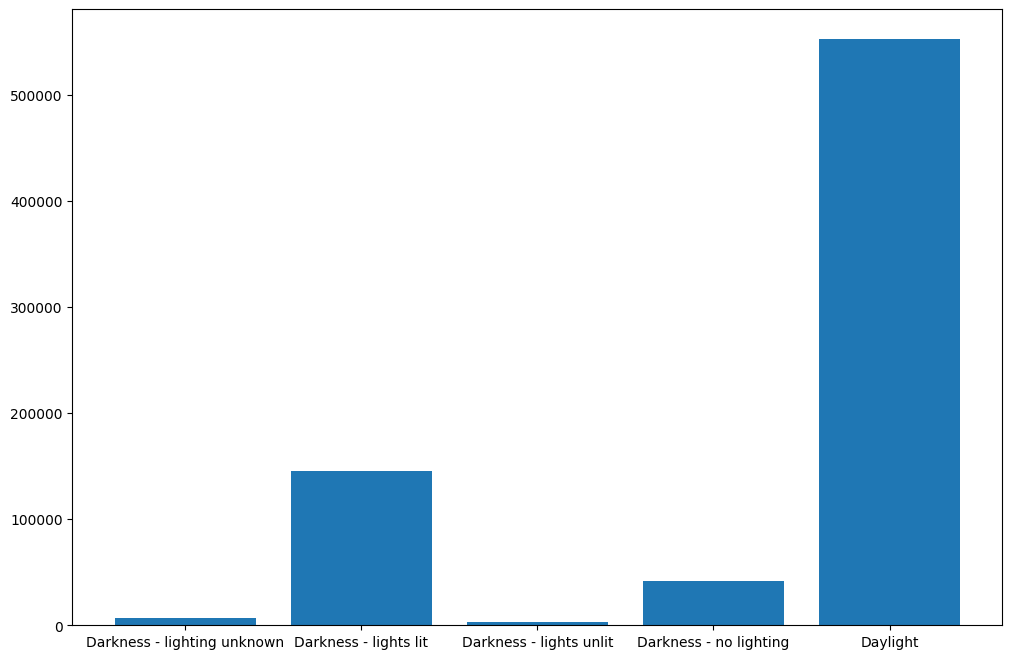

In [26]:
x = visual1['Light_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y)
plt.gcf().set_size_inches(12, 8)
plt.show()

<h1>Insight 6: CORRELATION OF NUMBER OF VEHICLES AND NUMBER OF CASUALTIES</h1>

In [27]:
n_vehicles = accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

In [28]:
n_vehicles

0.22888886126927557

<h3>Insight 6.1</h3>
<h4>There is no correlation between number of vehicles and number of casualties</h4>

In [29]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1>Insight 7: AVERAGE NUMBER OF CASUALTIES IN YEAR 2019</h1>

In [30]:
df_2019 = accident[accident['Year'] == 2019]

In [31]:
np.round(df_2019['Number_of_Casualties'].mean(), 1)

1.4

(array([0, 1, 2, 3]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022')])

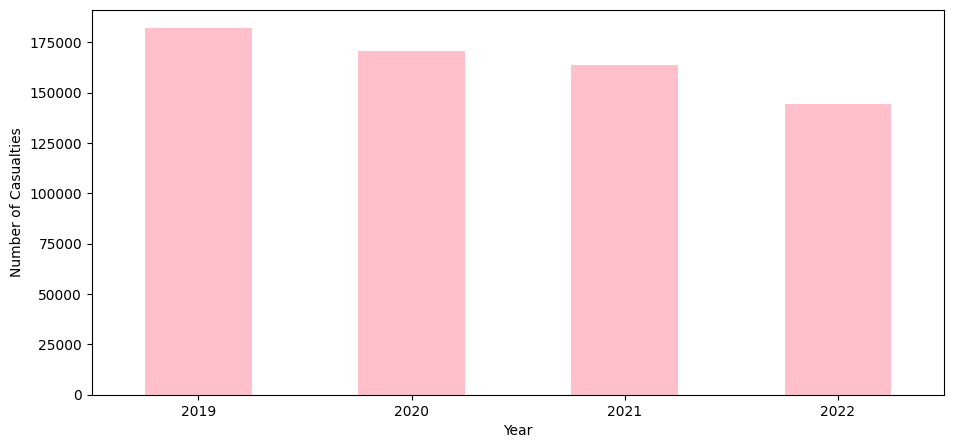

In [32]:
year2019 = accident['Year'].value_counts()

plt.figure(figsize=(11,5))
year2019.plot(kind='bar', color='pink')

plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)

<h3>Insight 7.1</h3>
<h4>The average number of casualties in year 2019 is 1.4</h4>

<h1>Insight 8: AVERAGE NUMBER OF VEHICLES IN YEAR 2019</h1>

In [33]:
df_2019 = accident[accident['Year'] == 2019]

In [34]:
np.round(df_2019['Number_of_Vehicles'].mean(), 1)

1.8

(array([0, 1, 2, 3]),
 [Text(0, 0, '2019'),
  Text(1, 0, '2020'),
  Text(2, 0, '2021'),
  Text(3, 0, '2022')])

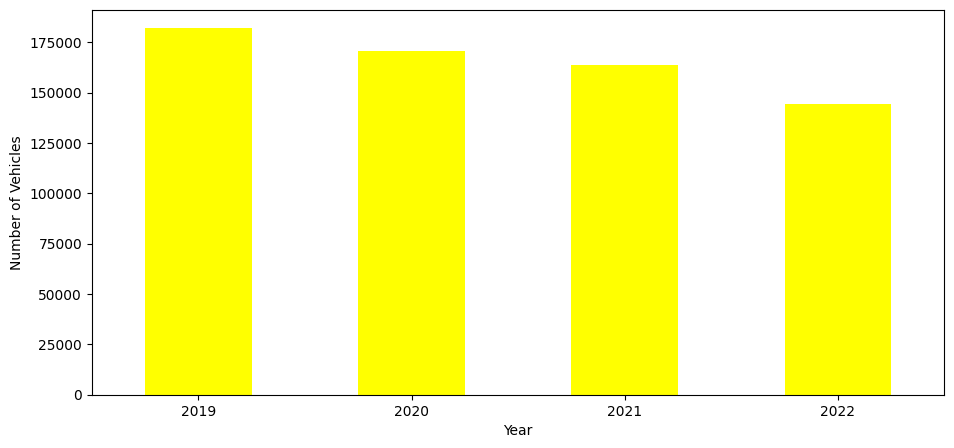

In [35]:
year2019_vehic = accident['Year'].value_counts()

plt.figure(figsize=(11,5))
year2019.plot(kind='bar', color='yellow')

plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)

<h3>Insight 8.1</h3>
<h4>The average number of vehicles in year 2019 is 1.8</h4>

In [36]:
accident.dtypes

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h1>Insight 9: AVERAGE NUMBER OF CASUALTIES IN URBAN AREA</h1>

In [37]:
urban = accident[accident['Urban_or_Rural_Area'] == 'Urban']

In [38]:
np.round(urban['Number_of_Casualties'].mean(), 1)

1.3

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Unallocated')])

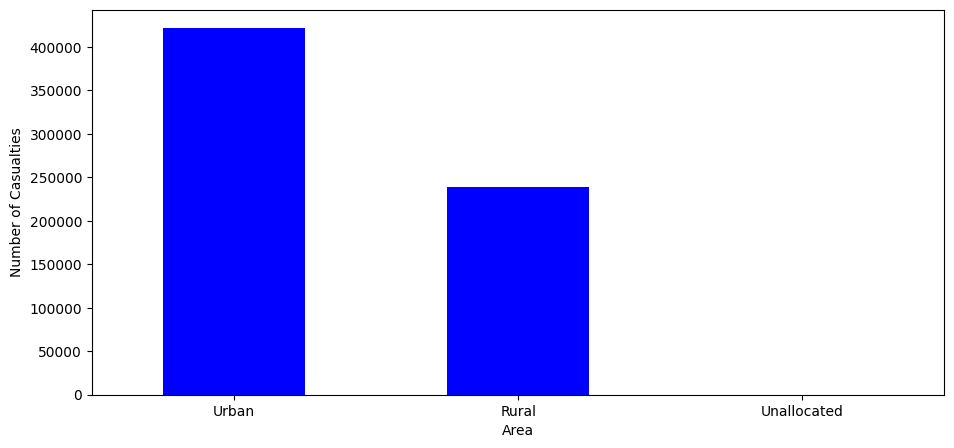

In [39]:
urban = accident['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(11,5))
urban.plot(kind='bar', color='blue')

plt.xlabel('Area')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)

<h3>Insight 9.1</h3>
<h4>The average number of casualties in Urban Area is 1.3</h4>

<h1>Insight 10: AVERAGE NUMBER OF CASUALTIES IN RURAL AREA</h1>

In [40]:
rural = accident[accident['Urban_or_Rural_Area'] == 'Rural']

In [41]:
np.round(rural['Number_of_Casualties'].mean(), 1)

1.5

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Unallocated')])

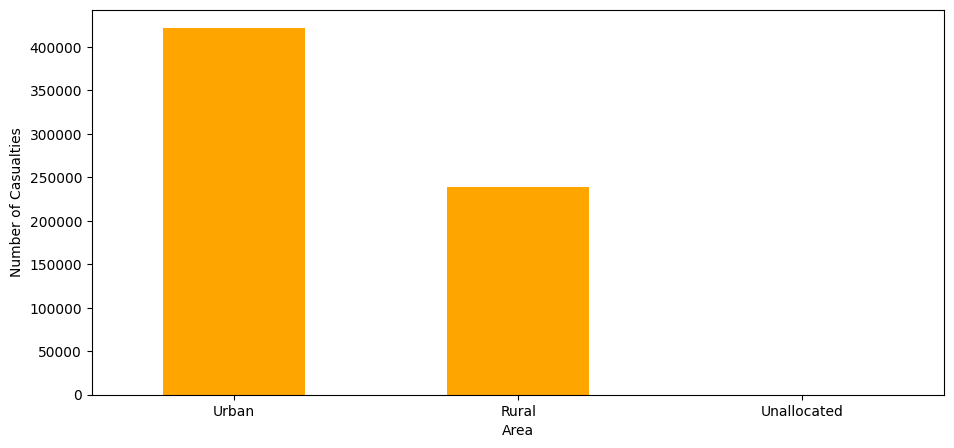

In [42]:
rural = accident['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(11,5))
rural.plot(kind='bar', color='orange')

plt.xlabel('Area')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)

<h3>Insight 10.1</h3>
<h4>The average number of casualties in Rural Area is 1.5</h4>

<h1>Insight 11: AVERAGE NUMBER OF CASUALTIES IN SERIOUS SEVERITY</h1>

In [43]:
serious = accident[accident['Accident_Severity'] == 'Serious']

In [44]:
np.round(serious['Number_of_Casualties'].mean(), 1)

1.5

<h3>Insight 11.1</h3>
<h4>The average number of casualties in serious accident severity is 1.5</h4>

In [45]:
severity_year = accident.groupby(['Accident_Severity', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = severity_year.pivot(index = 'Year', columns = 'Accident_Severity', values = 'Accident_Count')

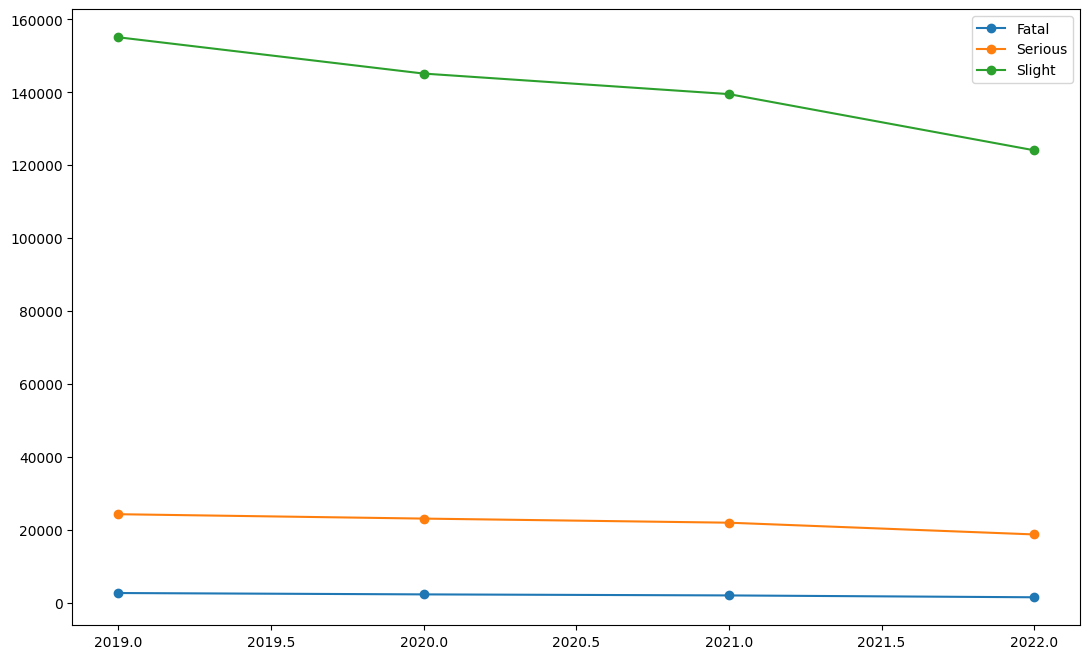

In [46]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

In [47]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h1>Insight 12: AVERAGE NUMBER OF CASUALTIES IN SLIGHT SEVERITY</h1>

In [48]:
slight = accident[accident['Accident_Severity'] == 'Slight']

In [49]:
np.round(slight['Number_of_Casualties'].mean(), 1)

1.3

<h3>Insight 12.1</h3>
<h4>The average number of casualties in slight accident severity is 1.3</h4>

In [50]:
severity_year = accident.groupby(['Accident_Severity', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = severity_year.pivot(index = 'Year', columns = 'Accident_Severity', values = 'Accident_Count')

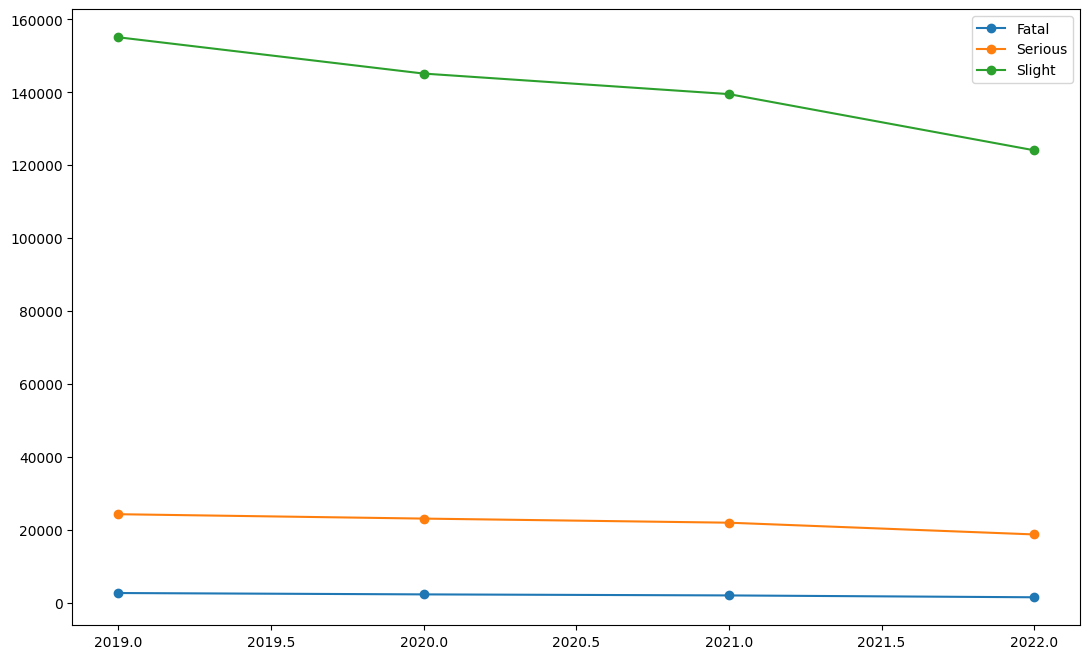

In [51]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Insight 13: AVERAGE NUMBER OF CASUALTIES IN FATAL SEVERITY</h1>

In [52]:
fatal = accident[accident['Accident_Severity'] == 'Fatal']

In [53]:
np.round(fatal['Number_of_Casualties'].mean(), 1)

1.9

<h3>Insight 13.1</h3>
<h4>The average number of casualties in slight accident severity is 1.3</h4>

In [54]:
severity_year = accident.groupby(['Accident_Severity', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = severity_year.pivot(index = 'Year', columns = 'Accident_Severity', values = 'Accident_Count')

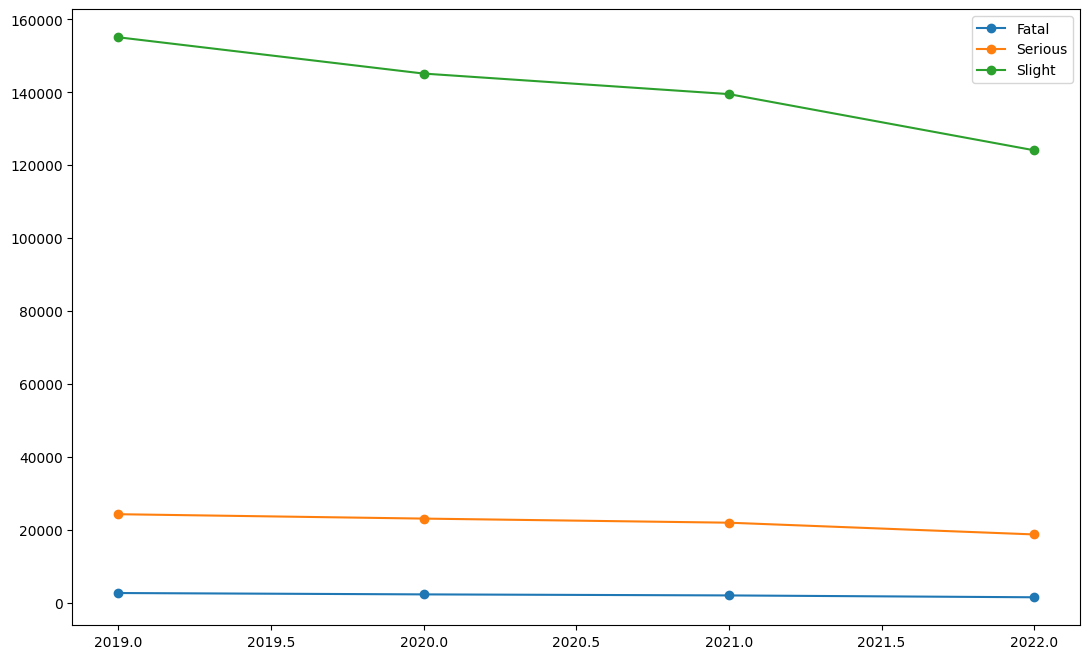

In [55]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Insight 14: DETERMINE THE AVERAGE NUMBER OF SEVERITY</h1>

In [56]:
np.round(accident['Accident_Severity'].value_counts().mean(), 1)

220226.3

<h3>Insight 14.1</h3>
<h4>The average number of accident severity is 220226.3</h4>

In [85]:
severity_year = accident.groupby(['Accident_Severity', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = severity_year.pivot(index = 'Year', columns = 'Accident_Severity', values = 'Accident_Count')

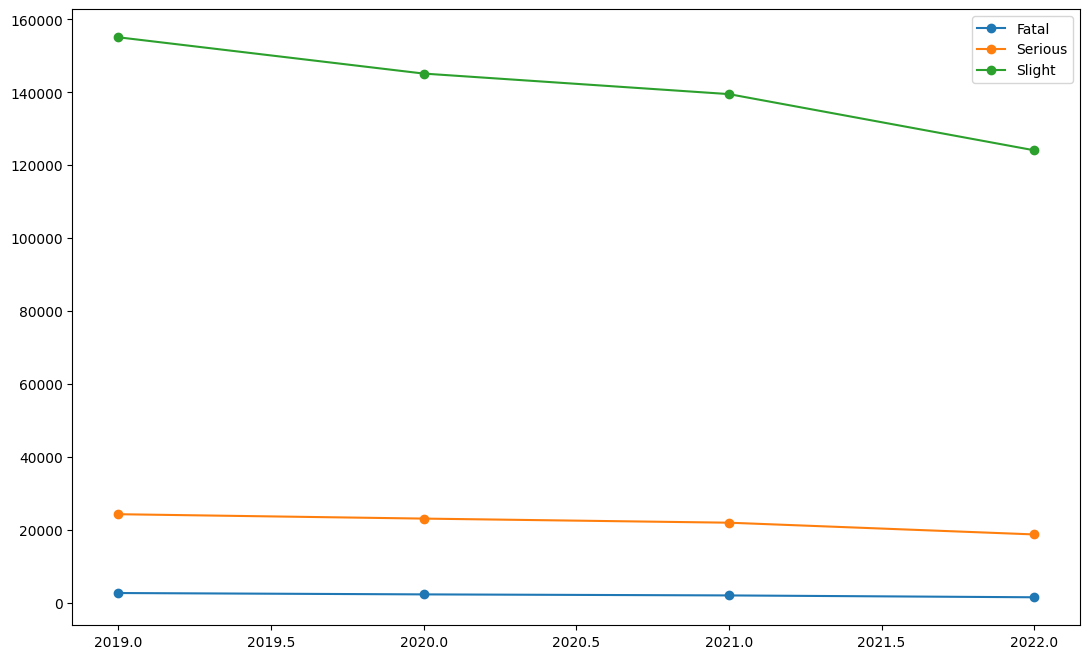

In [86]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Insight 15: AREA WITH THE HIGHEST NUMBER OF ACCIDENT</h1>

In [57]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Insight 15.1</h3>
<h4>The area has the highest number of accident is URBAN AREA</h4>

(array([0, 1, 2]),
 [Text(0, 0, 'Urban'), Text(1, 0, 'Rural'), Text(2, 0, 'Unallocated')])

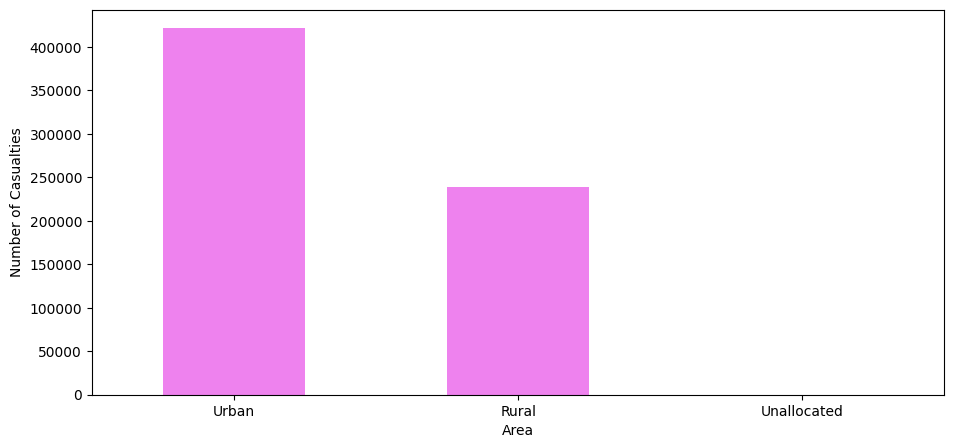

In [58]:
urban_rural = accident['Urban_or_Rural_Area'].value_counts()

plt.figure(figsize=(11,5))
urban_rural.plot(kind='bar', color='violet')

plt.xlabel('Area')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=0)

<h1>Insight 16: Shows the average number of casualties for each weather condition</h1>

In [59]:
df_2019 = accident[accident['Year'] == 2019]

df_2019['Weather_Conditions'].value_counts()

new_df = df_2019[df_2019['Weather_Conditions'] != 'unaccounted weather conditions']

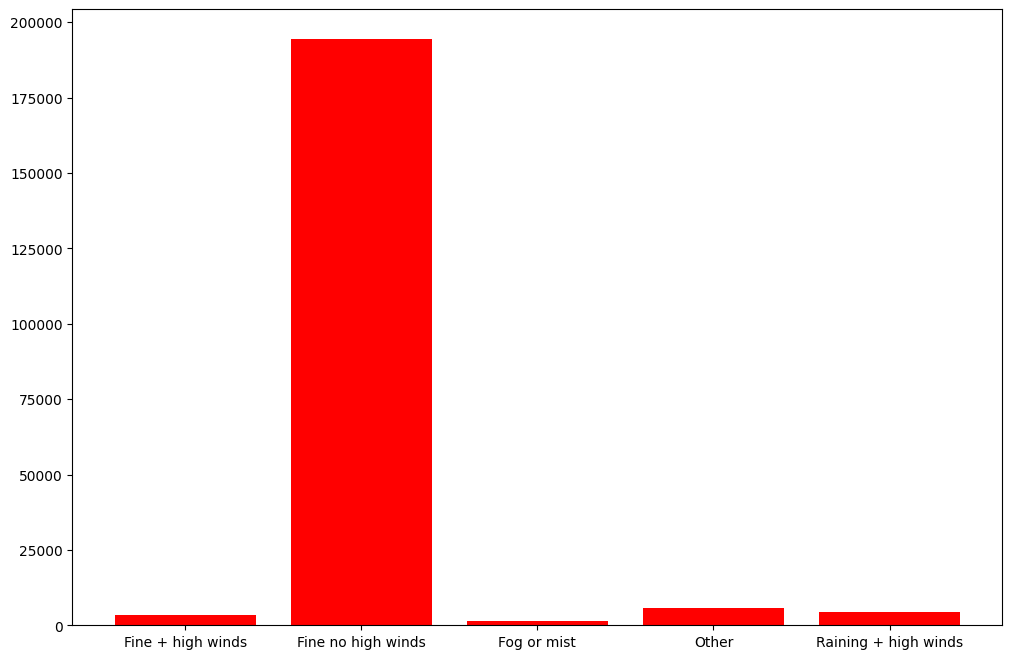

In [60]:
visual1 = new_df.groupby(['Weather_Conditions'])['Number_of_Casualties'].sum().reset_index().head()

x = visual1['Weather_Conditions']
y = visual1['Number_of_Casualties']

plt.bar(x, y, color="red")
plt.gcf().set_size_inches(12, 8)
plt.show()

In [61]:
accident_gby = np.round(accident.groupby(['Weather_Conditions'])['Number_of_Casualties'].mean(), 1)

In [62]:
accident_gby

Weather_Conditions
Fine + high winds                 1.4
Fine no high winds                1.4
Fog or mist                       1.5
Other                             1.4
Raining + high winds              1.4
Raining no high winds             1.4
Snowing + high winds              1.4
Snowing no high winds             1.3
unaccounted weather conditions    1.2
Name: Number_of_Casualties, dtype: float64

<h3>Insight 16.1</h3>
<h4>The weather condition that has highest average of number of casualties is Fog or mist</h4>

<h1>Insight 17: Reveals how road type and lighting conditions together </h1>

In [63]:
accident_gby2 = np.round(accident.groupby(['Road_Type', 'Light_Conditions'])['Number_of_Casualties'].mean(), 1)

In [64]:
accident_gby2

Road_Type           Light_Conditions           
Dual carriageway    Darkness - lighting unknown    1.4
                    Darkness - lights lit          1.5
                    Darkness - lights unlit        1.4
                    Darkness - no lighting         1.6
                    Daylight                       1.5
One way street      Darkness - lighting unknown    1.2
                    Darkness - lights lit          1.2
                    Darkness - lights unlit        1.2
                    Darkness - no lighting         1.5
                    Daylight                       1.2
Roundabout          Darkness - lighting unknown    1.3
                    Darkness - lights lit          1.3
                    Darkness - lights unlit        1.3
                    Darkness - no lighting         1.3
                    Daylight                       1.3
Single carriageway  Darkness - lighting unknown    1.3
                    Darkness - lights lit          1.4
                 

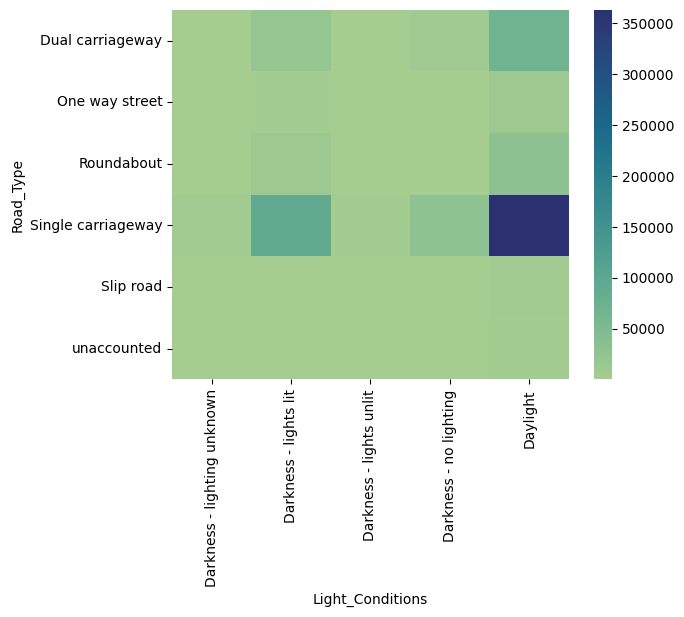

In [65]:
road_type = accident.groupby(['Road_Type', 'Light_Conditions']).size().unstack()

sns.heatmap(road_type, cmap='crest')
plt.show()

<h1>Insight 18: Checks if certain road type are more dangerous</h1>

In [66]:
r_type = np.round(accident.groupby(['Road_Type'])['Number_of_Casualties'].mean(), 1)

In [67]:
r_type

Road_Type
Dual carriageway      1.5
One way street        1.2
Roundabout            1.3
Single carriageway    1.3
Slip road             1.4
unaccounted           1.2
Name: Number_of_Casualties, dtype: float64

<h3>Insight 18.1</h3>
<h4>There is no correlation between the Road Type and Number of Casualties</h4>

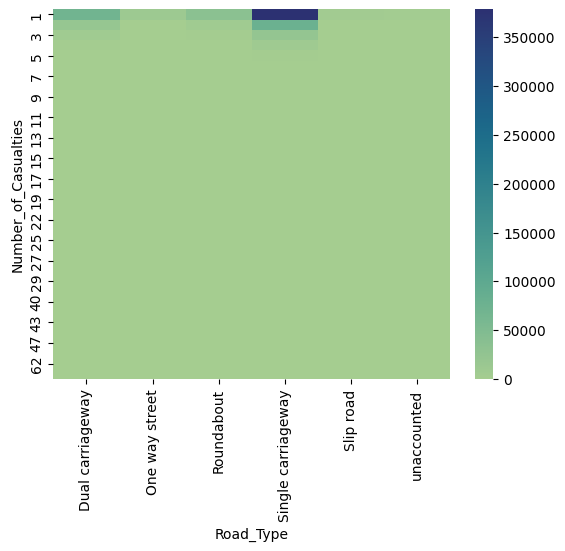

In [68]:
r_type = accident.groupby(['Number_of_Casualties', 'Road_Type']).size().unstack()

sns.heatmap(r_type, cmap='crest')
plt.show()

<h1>Insight 19: Finds if road surface conditions results in more casualties</h1>

In [69]:
r_surface  = np.round(accident.groupby(['Road_Surface_Conditions'])['Number_of_Casualties'].mean(), 1)

In [70]:
r_surface 

Road_Surface_Conditions
Dry                          1.3
Flood over 3cm. deep         1.5
Frost or ice                 1.3
Snow                         1.4
Wet or damp                  1.4
unknown surface condition    1.2
Name: Number_of_Casualties, dtype: float64

<h3>Insight 19.1</h3>
<h4>There is no correlation between the Road Surface Conditions and Number of Casualties</h4>

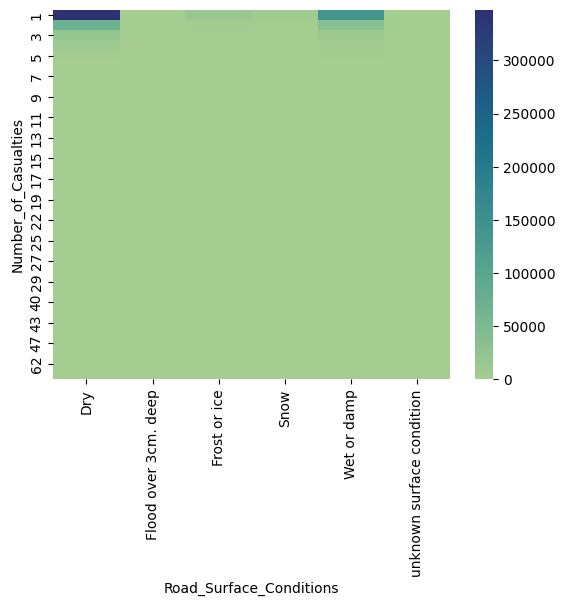

In [71]:
road_surface = accident.groupby(['Number_of_Casualties', 'Road_Surface_Conditions']).size().unstack()

sns.heatmap(road_surface, cmap='crest')
plt.show()

<h1>Insight 20: Identify which type of vehicles are most involved in accidents</h1>

In [72]:
accident_gby3 = accident.groupby('Vehicle_Type').size()

In [73]:
accident_gby3

Vehicle_Type
Agricultural vehicle                       1947
Bus or coach (17 or more pass seats)      25878
Car                                      497992
Data missing or out of range                  6
Goods 7.5 tonnes mgw and over             17307
Goods over 3.5t. and under 7.5t            6096
Minibus (8 - 16 passenger seats)           1976
Motorcycle 125cc and under                15269
Motorcycle 50cc and under                  7603
Motorcycle over 125cc and up to 500cc      7656
Motorcycle over 500cc                     25657
Other vehicle                              5637
Pedal cycle                                 197
Ridden horse                                  4
Taxi/Private hire car                     13294
Van / Goods 3.5 tonnes mgw or under       34160
dtype: int64

<h3>Insight 20.1</h3>
<h4>The type of vehicle that is most involved in accidents is Car</h4>

In [74]:
vType_year = accident.groupby(['Vehicle_Type', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = vType_year.pivot(index = 'Year', columns = 'Vehicle_Type', values = 'Accident_Count')

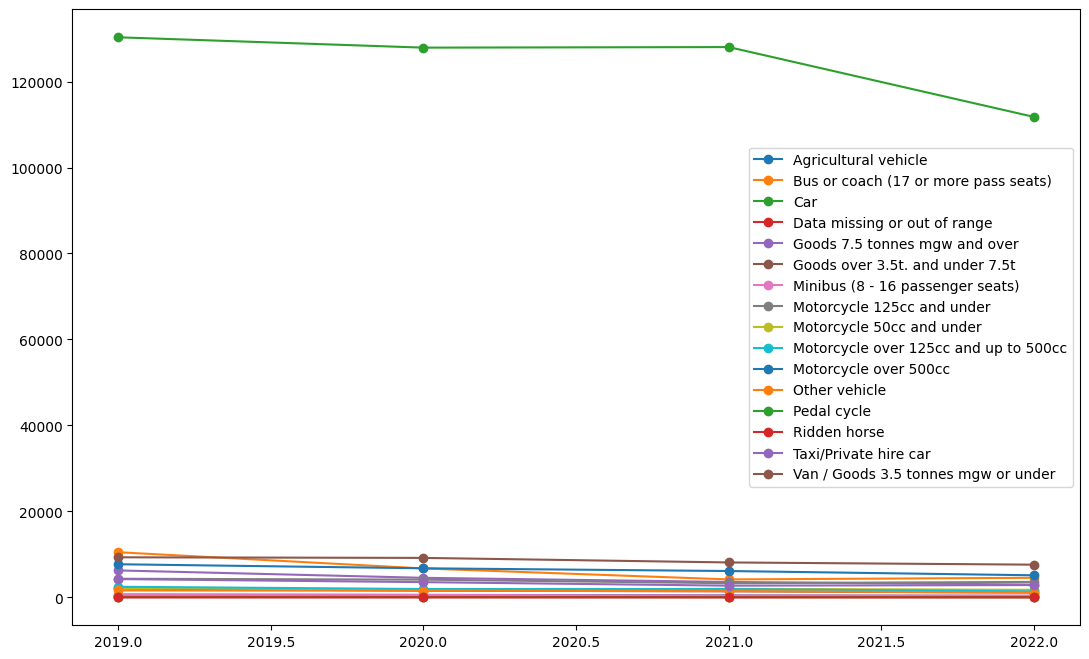

In [75]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Insight 21</h1>

In [76]:
r_type1  = np.round(accident.groupby(['Road_Type'])['Month'].mean(), 1)

In [77]:
r_type1

Road_Type
Dual carriageway      6.6
One way street        6.6
Roundabout            6.6
Single carriageway    6.6
Slip road             6.6
unaccounted           6.6
Name: Month, dtype: float64

<h3>Insight 21.1</h3>
<h4>There is a correlation between road type and month</h4>

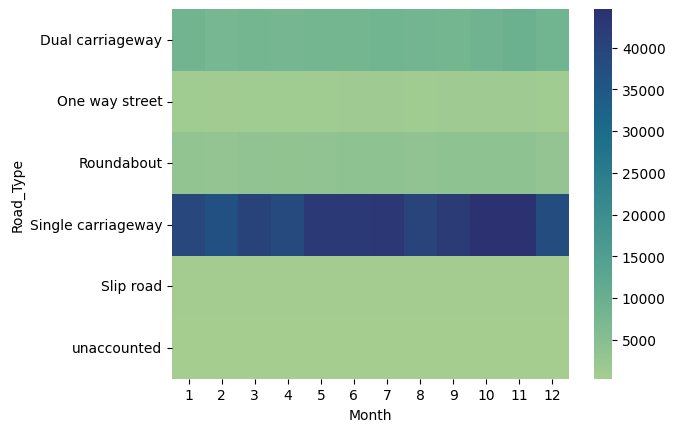

In [78]:
road_surface = accident.groupby(['Road_Type', 'Month']).size().unstack()

sns.heatmap(road_surface, cmap='crest')
plt.show()

<h1>Insight 22</h1>

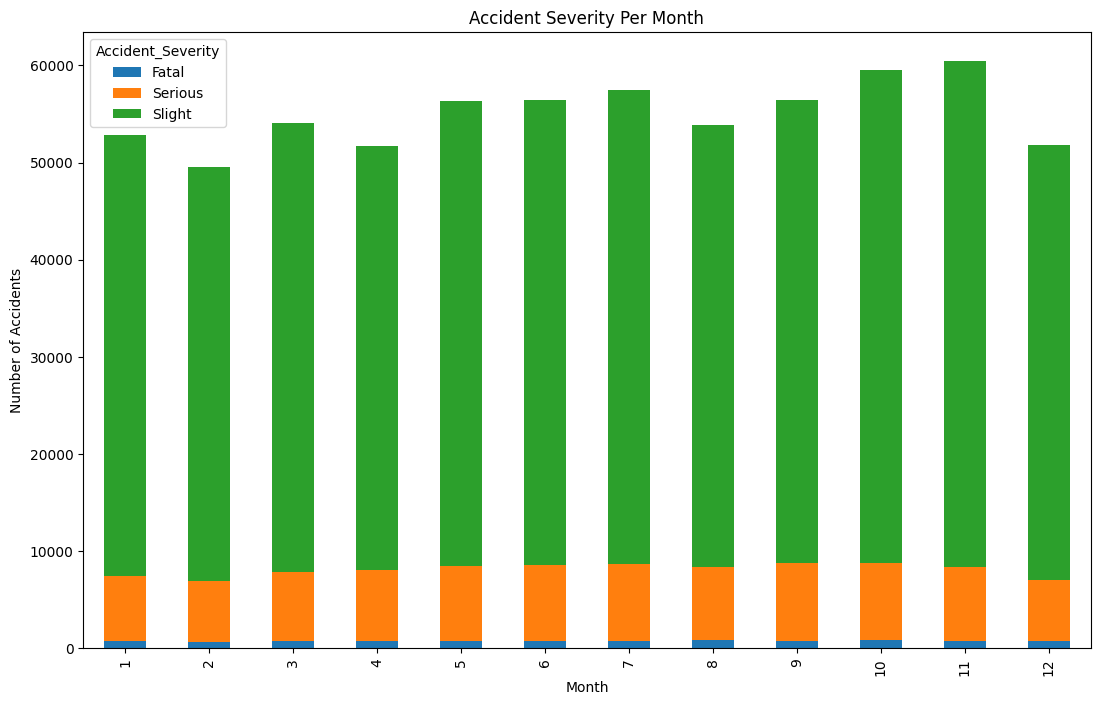

In [79]:
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

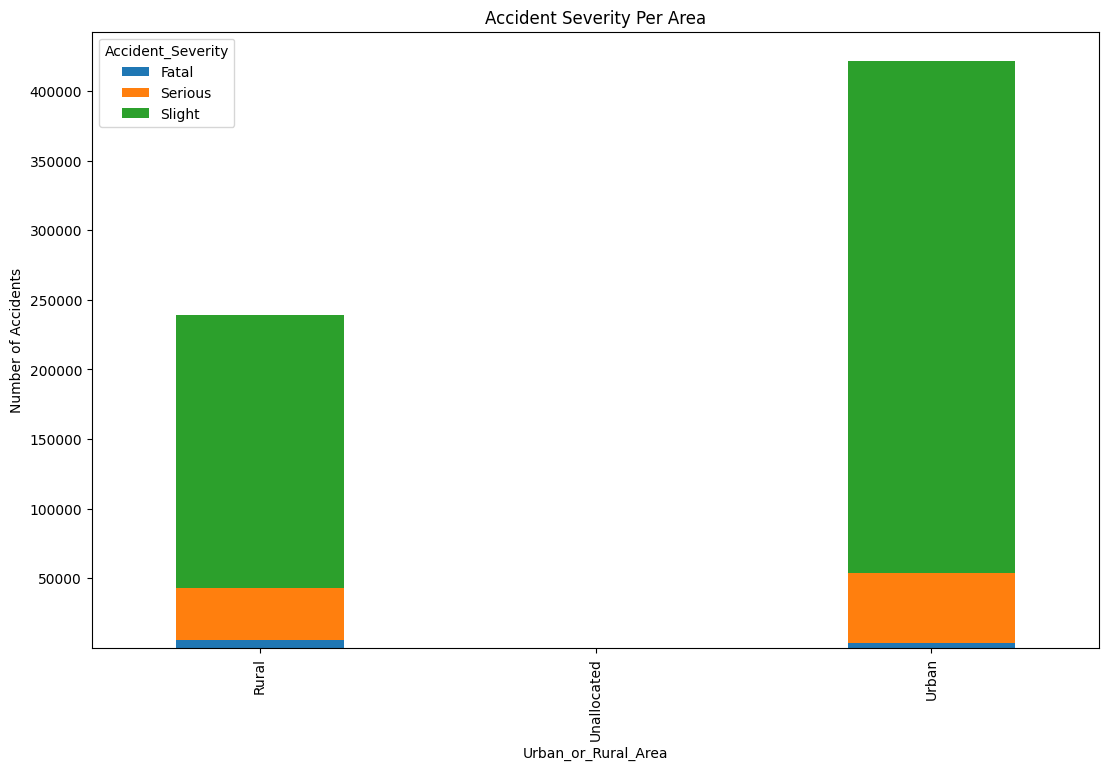

In [80]:
accidents_per_month_severity = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack().fillna(0)

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity Per Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

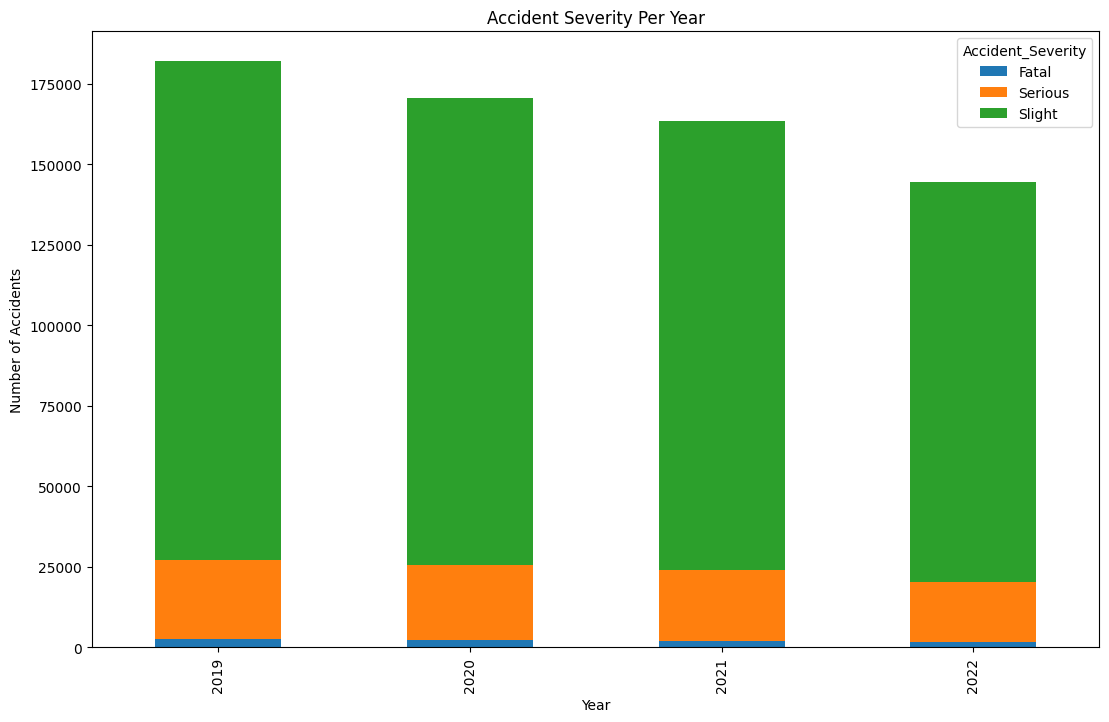

In [81]:
accidents_per_month_severity = accident.groupby(['Year', 'Accident_Severity']).size().unstack().fillna(0)

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accident Severity Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13, 8)
plt.show()

<h1>AREA ANALYSIS</h1>

In [82]:
area_year = accident.groupby(['District Area', "Year"]).size().reset_index(name= "Accident_Count")
pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')

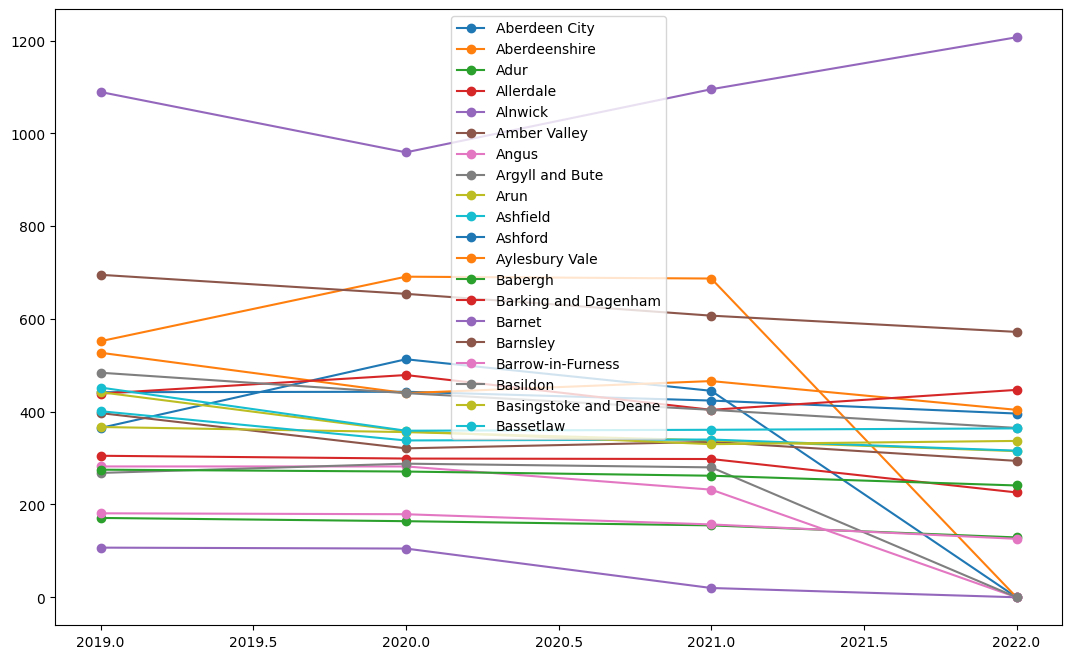

In [83]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index, pivot_table[x], label = x, marker='o')
    if count == 20:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

<h1>Visualizing Correlation</h1>

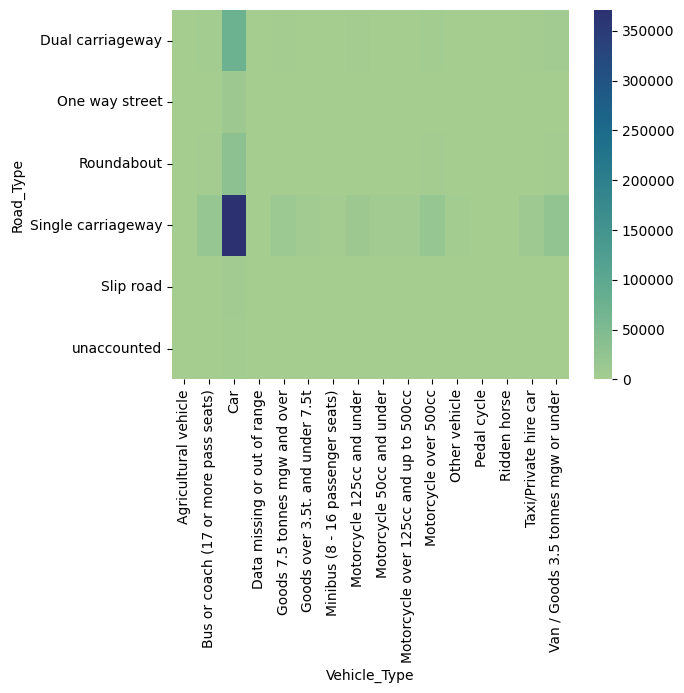

In [84]:
type_vh = accident.groupby(['Road_Type', 'Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap='crest')
plt.show()